In [52]:
import pandas as pd
import numpy as np
import re

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
data = pd.read_csv('ALL_data.csv', index_col='PID')
sector = pd.read_csv('Sectors.csv', index_col='PID')
data.columns

Index(['GrLivArea', 'SalePrice', 'MSSubClass', 'MSZoning', 'LotFrontage',
       'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'Pav

In [3]:
data['Neighborhood'].isna().sum(axis=0)

0

### Land based features
* MSZoning / LotArea / LotShape / LandContour / Utilities / LandSlope / Condition1 / Condition2 / Sector

In [34]:
landfeats = data[['MSZoning','LotArea','LotShape','LandContour','Utilities','LandSlope','Condition1','Condition2']].copy()
y = data.SalePrice.copy()

In [35]:
landfeats = landfeats.join(sector.Sector, how='left', on='PID')
landfeats = landfeats[~landfeats.index.duplicated(keep='first')] #Rows get duplicated on left_join for some reason...

**Numeric Features:** LotArea

In [36]:
landfeats.LotArea.describe()

count      2579.000000
mean      10119.269484
std        8128.389882
min        1300.000000
25%        7406.500000
50%        9382.000000
75%       11485.500000
max      215245.000000
Name: LotArea, dtype: float64

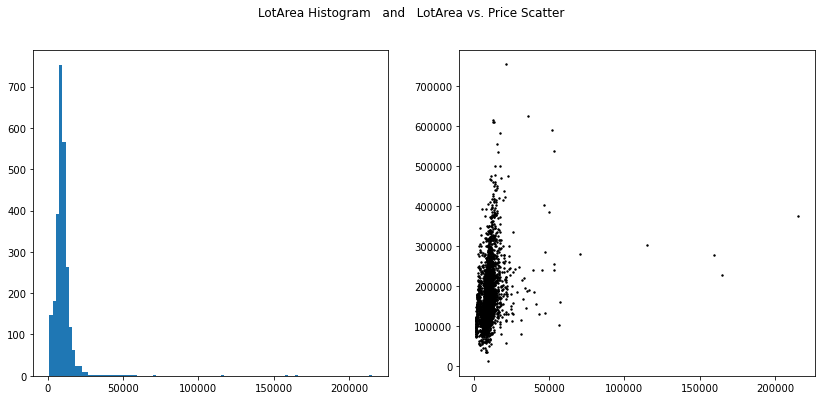

In [65]:
#Set plot size
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6))
fig.suptitle('LotArea Histogram   and   LotArea vs. Price Scatter')

ax1.hist(landfeats.LotArea, bins=100)
ax2.scatter(x=landfeats.LotArea,y=y,s=2,c='k')

**Categorical Features:** MSZoning / LotShape / LandContour / Utilities / LandSlope / Condition1 / Condition2 / Sector

In [141]:
for col in landfeats.drop('LotArea', axis=1).columns:
    print(landfeats[col].value_counts())
    print('---------------------------')

RL         2007
RM          418
FV          113
RH           21
C (all)      17
I (all)       2
A (agr)       1
Name: MSZoning, dtype: int64
---------------------------
Reg    1640
IR1     855
IR2      71
IR3      13
Name: LotShape, dtype: int64
---------------------------
Lvl    2337
Bnk      95
HLS      95
Low      52
Name: LandContour, dtype: int64
---------------------------
AllPub    2577
NoSewr       2
Name: Utilities, dtype: int64
---------------------------
Gtl    2458
Mod     108
Sev      13
Name: LandSlope, dtype: int64
---------------------------
Norm      2227
Feedr      137
Artery      81
RRAn        40
PosN        37
RRAe        26
PosA        19
RRNn         8
RRNe         4
Name: Condition1, dtype: int64
---------------------------
Norm      2554
Feedr       12
Artery       3
PosN         3
PosA         3
RRNn         2
RRAe         1
RRAn         1
Name: Condition2, dtype: int64
---------------------------
NO    793
SW    641
NW    614
DT    393
SE    138
Name: Sector,

In [71]:
land_all = y.to_frame().merge(landfeats, on='PID')

In [125]:
land_all['MSZoning'].value_counts().index

Index(['RL', 'RM', 'FV', 'RH', 'C (all)', 'I (all)', 'A (agr)'], dtype='object')

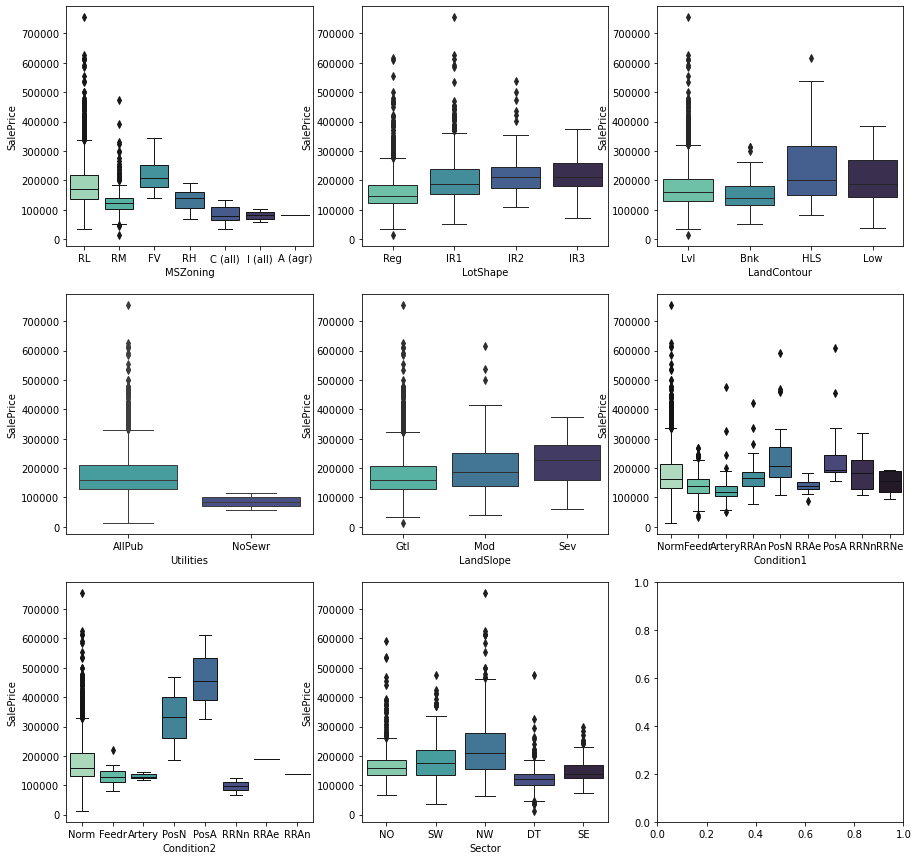

In [139]:
fig, ax = plt.subplots(3,3, figsize=(15,15))

for idx, COL in enumerate(landfeats.drop('LotArea', axis=1).columns):
    sns.boxplot(ax=ax[idx//3,idx%3],
            x=land_all[COL], y=land_all['SalePrice'], 
            order = land_all[COL].value_counts().index,
            palette="mako_r", linewidth=1)

### Findings
* LotShape and LandContour and LandSlope: may not be useful. Similar SalePrice, and concentrated in 1-2 categories
* Utilities: only 2 houses have 'No Sewer', rest are same
* Condition1 & Condition2: may be useful if a house is of PosN or PosA category, otherwise, not much use.